# 正则化线性回归模型

In [113]:
import numpy as np
import matplotlib.pyplot as plt

## 构建一个高阶函数

In [114]:
x = np.linspace(-1, 1, 10)
X = np.array([x, x**2, x**3]).T
X.shape

(10, 3)

In [115]:
true_w = np.array([10, 5.2, 2.0])
true_b = -10.0

In [116]:
y_target = X @ true_w + true_b
y = y_target + np.random.normal(0, 5, y_target.shape[0])
y.shape = (-1, 1)

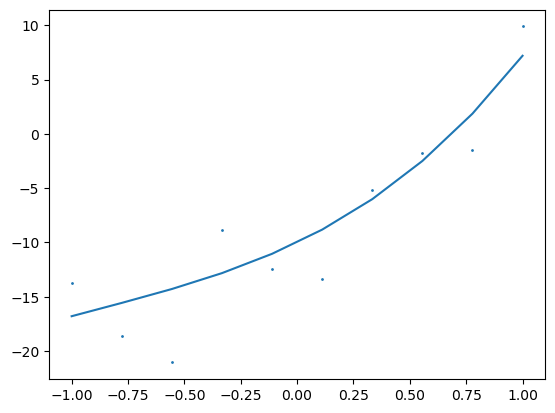

In [117]:
plt.plot(x, y_target)
plt.scatter(x, y, s=1)
plt.show()

## 特征工程

In [118]:
X = np.array([x, x**2, x**3, x**4, x**5, x**6, np.sin(x)]).T
X.shape

(10, 7)

### 特征缩放

In [119]:
def min_max_normalize(data):
    """对 (N, 特征数) 数据进行每个特征列的 Min-Max 归一化"""
    min_vals = np.min(data, axis=0)  # 按列计算最小值
    max_vals = np.max(data, axis=0)  # 按列计算最大值
    return (data - min_vals) / (max_vals - min_vals)

In [120]:
X_normalize = min_max_normalize(X)

In [121]:
X_normalize

array([[0.        , 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.        ],
       [0.11111111, 0.6       , 0.26474623, 0.36585366, 0.35768599,
        0.22137588, 0.08305284],
       [0.22222222, 0.3       , 0.41426612, 0.09512195, 0.47353893,
        0.02939937, 0.18661107],
       [0.33333333, 0.1       , 0.48148148, 0.01219512, 0.49794239,
        0.00136986, 0.30558171],
       [0.44444444, 0.        , 0.49931413, 0.        , 0.49999153,
        0.        , 0.43411381],
       [0.55555556, 0.        , 0.50068587, 0.        , 0.50000847,
        0.        , 0.56588619],
       [0.66666667, 0.1       , 0.51851852, 0.01219512, 0.50205761,
        0.00136986, 0.69441829],
       [0.77777778, 0.3       , 0.58573388, 0.09512195, 0.52646107,
        0.02939937, 0.81338893],
       [0.88888889, 0.6       , 0.73525377, 0.36585366, 0.64231401,
        0.22137588, 0.91694716],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1. 

In [122]:
y_normalize = min_max_normalize(y)
y_normalize

array([[0.23773281],
       [0.08012142],
       [0.        ],
       [0.39489856],
       [0.27702419],
       [0.24861468],
       [0.51388621],
       [0.62441822],
       [0.63138003],
       [1.        ]])

## 模型训练

### 初始化参数

In [123]:
w = np.random.randn(X.shape[-1])
b = 0.0

In [124]:
w_b = np.hstack([w, b]).reshape(-1, 1)
X_b = np.hstack([X_normalize, np.ones(X.shape[0]).reshape(-1, 1)])

In [125]:
w_b.shape, X_b.shape

((8, 1), (10, 8))

### 设置超参数

In [126]:
alpha = 0.3
epochs = 300

### 梯度下降

In [127]:
cost_lst = []
for epoch in range(epochs):
    y_hat = X_b @ w_b
    J = 1/2 * ((y_hat - y_normalize) ** 2).mean()
    Jw = ((y_hat - y_normalize) * X_b).mean(axis=0).reshape(-1, 1)
    w_b = w_b - alpha * Jw
    cost_lst.append(J)

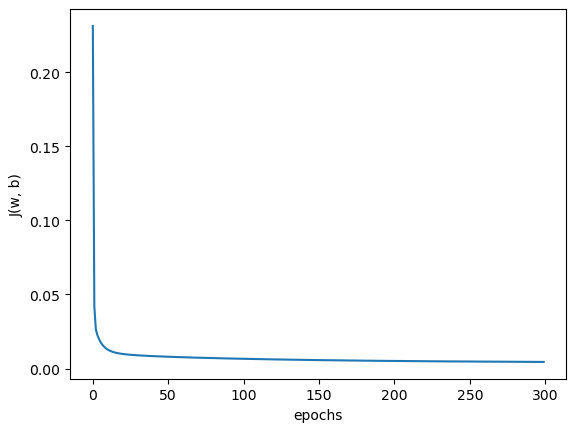

In [128]:
plt.plot(range(epochs), cost_lst)
plt.xlabel('epochs')
plt.ylabel('J(w, b)')
plt.show()

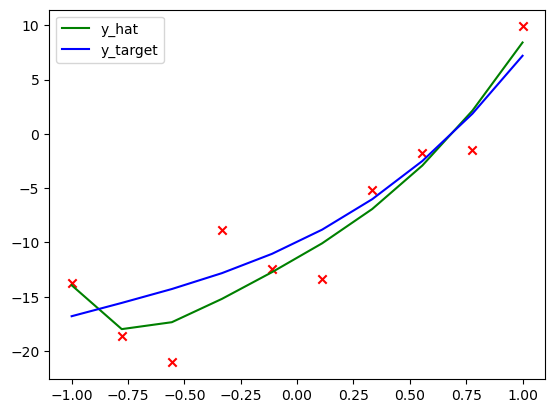

In [129]:
y_hat = (X_b @ w_b) * (y.max() - y.min()) + y.min()
plt.plot(x, y_hat, label='y_hat', c='g')
plt.plot(x, y_target, label='y_target', c='b')
plt.scatter(x, y, c='r', marker='x')
plt.legend()
plt.show()

### 加入正则项

In [130]:
def linear_regression_gradient_descent(w, b, alpha, beta):
    w_b = np.hstack([w, b]).reshape(-1, 1)
    cost_lst = []
    for epoch in range(epochs):
        y_hat = X_b @ w_b
        J = 1/2 * ((y_hat - y_normalize) ** 2).mean() 
        Jw = ((y_hat - y_normalize) * X_b).mean(axis=0).reshape(-1, 1)
        w_b = w_b * (1 - alpha * beta) - alpha * Jw
        cost_lst.append(J)
    # plt.plot(range(epochs), cost_lst)
    # plt.xlabel('epochs')
    # plt.ylabel('J(w, b)')
    # plt.show()
    y_hat = (X_b @ w_b) * (y.max() - y.min()) + y.min()
    plt.plot(x, y_hat, label='y_hat', c='g')
    plt.plot(x, y_target, label='y_target', c='b')
    plt.scatter(x, y, c='r', marker='x')
    plt.legend()
    plt.show()

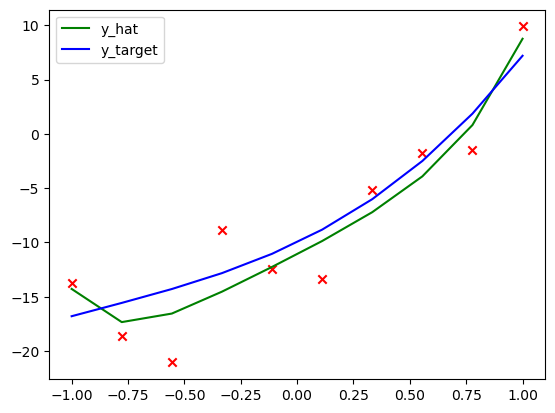

In [138]:
linear_regression_gradient_descent(w, b, 0.3, 0.01)